In [1]:
#########################################
##  Plot workload (# of cells) Profile
#########################################
import numpy as np
import linecache
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
###################################
##### PROVIDE INPUTS HERE !!! #####
###################################

# Specify the input file to read
readfilename = "/media/emily/EMO-64G/yes_vm8n2r_irmperi_tohoku_3hr/console.out"

# Specify the output figure path & name
figname_prefix = '/media/emily/EMO-64G/yes_vm8n2r_irmperi_tohoku_3hr/'
figname_suffix = '.pdf'


In [3]:
###########################
##### Data Processing #####
###########################

# There are 3 phases: "initialization", "earthquake displacement data", "tsunami simulation"
# Create 3 sets of lists

# sim time not available in init phase
init_wall_time = []
init_cells_per_rank = []
init_ranks = []

eqk_wall_time = []
eqk_time_step = []
eqk_cells_per_rank = []
eqk_ranks = []

tsu_wall_time = []
tsu_time_step = []
tsu_cells_per_rank = []
tsu_ranks = []

f = open(readfilename, 'r')
for i, line in enumerate(f,1):
    if "SWE Init: adaption" in line:
        arr = line.split()
        init_wall_time += [float(arr[8])]
        init_cells_per_rank += [int(arr[11])]
        init_ranks += [int(arr[14])]
        
    elif "SWE Earthquake: dt" in line:
        arr = line.split()    
        eqk_wall_time += [float(arr[12])]
        eqk_time_step += [int(arr[16])]
        eqk_cells_per_rank += [int(arr[19])]
        eqk_ranks += [int(arr[22])]
    
    elif "SWE Tsunami: dt" in line:
        arr = line.split()    
        tsu_wall_time += [float(arr[14])]
        tsu_time_step += [int(arr[18])]
        tsu_cells_per_rank += [int(arr[21])]
        tsu_ranks += [int(arr[24])]
f.close()


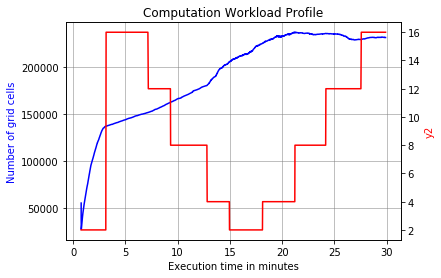

In [9]:
############################
## Plot Workload Profile:
##   Cells vs. Exec.Time
############################
tsu_cells = np.array(tsu_cells_per_rank) * np.array(tsu_ranks)
time_in_min = np.array(tsu_wall_time) / 60

fig = plt.figure()
ax = fig.gca()
ax.plot(time_in_min, tsu_cells, 'b-')
ax.set_xlabel("Execution time in minutes")
ax.set_ylabel("Number of grid cells", color='b')

ax.grid(b=True, color='grey', linestyle='-', linewidth=0.5)

ax2 = ax.twinx()
ax2.plot(time_in_min, tsu_ranks, 'r-')
ax2.set_ylabel('y2', color='r')
# for tl in ax2.get_yticklabels():
#     tl.set_color('r')




fig = plt.figure()
host = fig.add_subplot(111)
par1 = host.twinx()
par2 = host.twinx()

colorhost = 'b'
colorpar1 = 'r'
colorpar2 = 'g'

host.set_xlabel("Execution time in minutes")
host.set_ylabel("Number of MPI ranks", color=colorhost)
par1.set_ylabel("Number of grid cells (total)", color=colorpar1)
par2.set_ylabel("Number of grid cells per rank", color=colorpar2)

p1, = host.plot(time_in_min, tsu_ranks, color=colorhost,label="MPI ranks")
p2, = par1.plot(time_in_min, tsu_cells, color=colorpar1, label="# of total grid cells")
p3, = par2.plot(time_in_min, tsu_cells_per_rank, color=colorpar2, label="# of grid cells per MPI rank")

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')












fig.savefig(figname_prefix + "fig_workload_profile" + figname_suffix, bbox_inches="tight")

In [12]:
plt.close(fig)